In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
tb2 = pd.read_csv ("kreditjerman1.csv")

In [6]:
tb2.head()

,Saldo(Bulan,Durasi(Bulan),JmlSaldo(Mata Uang DM),Kredibilitas
0,1,2,5,0
1,1,18,1049,1
2,1,9,2799,1
3,2,12,841,1
4,1,12,2122,1


In [7]:
print (tb2.describe())

       Saldo(Bulan  Durasi(Bulan)  JmlSaldo(Mata Uang DM)  Kredibilitas
count  1002.000000    1002.000000             1002.000000   1002.000000
mean      2.573852      20.874251             3268.620758      0.699601
std       1.258353      12.065595             2821.889369      0.458661
min       1.000000       2.000000                5.000000      0.000000
25%       1.000000      12.000000             1364.500000      0.000000
50%       2.000000      18.000000             2319.500000      1.000000
75%       4.000000      24.000000             3970.500000      1.000000
max       4.000000      72.000000            18424.000000      1.000000


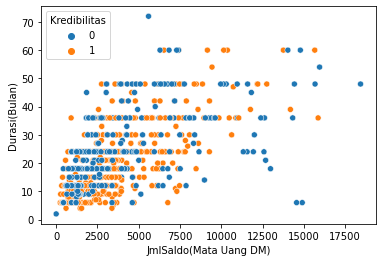

In [8]:
#scatter plot
sns.scatterplot(x="JmlSaldo(Mata Uang DM)",y="Durasi(Bulan)",data =tb2, hue="Kredibilitas")
plt.show()

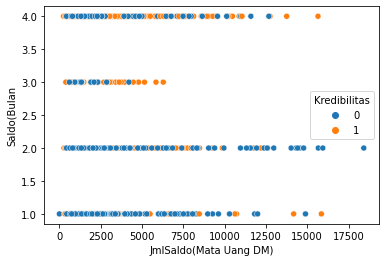

In [9]:
#scatter plot
sns.scatterplot(x="JmlSaldo(Mata Uang DM)",y="Saldo(Bulan",data =tb2, hue="Kredibilitas")
plt.show()

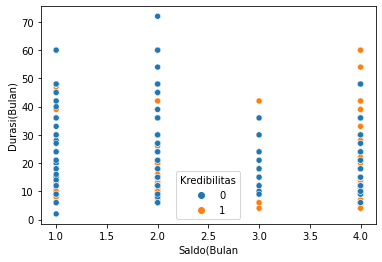

In [10]:
#scatter plot
sns.scatterplot(x="Saldo(Bulan",y="Durasi(Bulan)",data =tb2, hue="Kredibilitas")
plt.show()

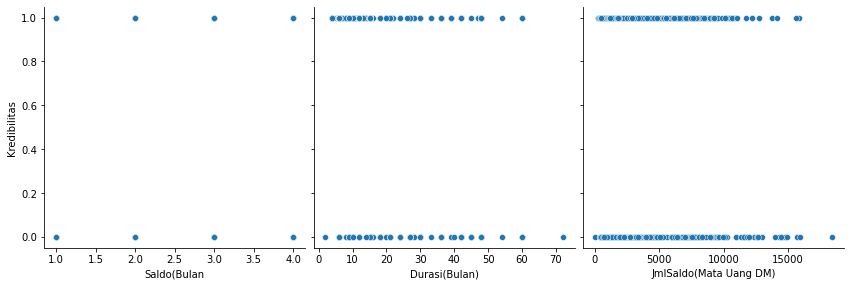

In [11]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(tb2, x_vars=['Saldo(Bulan', 'Durasi(Bulan)','JmlSaldo(Mata Uang DM)'], 
             y_vars='Kredibilitas', size=4, aspect=1, kind='scatter')
plt.show()

In [12]:
#prepare the training set
X = tb2.iloc[:, :-1]
y = tb2.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
#train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 1]


In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 32,  68],
       [ 17, 184]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

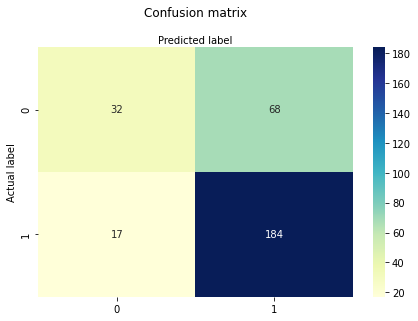

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
#check precision, recall, f1-score
print(classification_report(y_test, y_pred))
print("accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.32      0.43       100
           1       0.73      0.92      0.81       201

    accuracy                           0.72       301
   macro avg       0.69      0.62      0.62       301
weighted avg       0.70      0.72      0.69       301

accuracy:  0.717607973421927


In [19]:
tb2.loc[:, :]
tb2.loc[:,]
tb2.iloc[:, :]
tb2.iloc[:]
tb2

,Saldo(Bulan,Durasi(Bulan),JmlSaldo(Mata Uang DM),Kredibilitas
0,1,2,5,0
1,1,18,1049,1
2,1,9,2799,1
3,2,12,841,1
4,1,12,2122,1
...,...,...,...,...
997,1,24,1987,0
998,1,24,2303,0
999,4,21,12680,0
1000,2,12,6468,0


In [21]:
import warnings
warnings.filterwarnings('ignore')

tb2 = pd.read_csv("kreditjerman2.csv", header=None, names=["Saldo(Bulan", "Durasi(Bulan)", "JmlSaldo(Mata Uang DM)"])
tb2.head()

,Saldo(Bulan,Durasi(Bulan),JmlSaldo(Mata Uang DM)
0,4,12,1736
1,4,12,3059
2,1,24,2996
3,4,30,7596
4,1,12,1082
